In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,.\images\N1.jpeg,1093,1396,645,727
1,.\images\N100.jpeg,134,301,312,350
2,.\images\N101.jpeg,31,139,128,161
3,.\images\N102.jpeg,164,316,216,243
4,.\images\N103.jpeg,813,1067,665,724


In [3]:
image_path = df['filepath'].to_list()

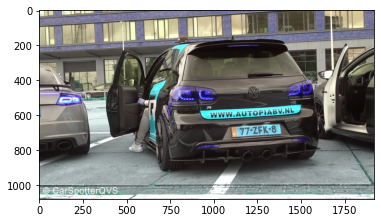

In [4]:
img = cv2.imread(image_path[0])
plt.imshow(img)
plt.show()

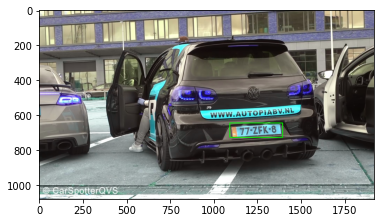

In [5]:
cv2.rectangle(img,(1093,645),(1396,727),(0,255,0),3)
plt.imshow(img)
plt.show()

# Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
labels = df.iloc[:,1:].values

In [10]:
data = []
output = []
for index in range(len(image_path)):
    image = image_path[index]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape

    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0

    xmin,xmax,ymin,ymax = labels[index]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax)

    data.append(norm_load_image_arr)
    output.append(label_norm)

In [11]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [12]:
X.shape,y.shape

((225, 224, 224, 3), (225, 4))

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

# Deep Learning Model

In [14]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [15]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)
model = Model(inputs=inception_resnet.input,outputs=headmodel)

219070464/219055592 [==============================] - 4s 0us/step


In [16]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
from tensorflow.keras.callbacks import TensorBoard

In [22]:
tfb = TensorBoard('./models/object_detection')

In [23]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/100
18/18 [==============================] - 1s 65ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 2/100
18/18 [==============================] - 1s 49ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 8.9604e-04 - val_loss: 0.0056
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 7.8741e-04 - val_loss: 0.0065
Epoch 5/100
18/18 [==============================] - 1s 48ms/step - loss: 6.5584e-04 - val_loss: 0.0063
Epoch 6/100
18/18 [==============================] - 1s 47ms/step - loss: 5.7072e-04 - val_loss: 0.0067
Epoch 7/100
18/18 [==============================] - 1s 48ms/step - loss: 5.2039e-04 - val_loss: 0.0060
Epoch 8/100
18/18 [==============================] - 1s 47ms/step - loss: 6.2502e-04 - val_loss: 0.0065
Epoch 9/100
18/18 [==============================] - 1s 48ms/step - loss: 5.3670e-04 - val_loss: 0.0065
Epoch 10/100
18/18 [==============================] - 1s 48ms/step - los

In [24]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=200,validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=101)

Epoch 102/200
18/18 [==============================] - 1s 64ms/step - loss: 2.6176e-04 - val_loss: 0.0060
Epoch 103/200
18/18 [==============================] - 1s 47ms/step - loss: 2.8795e-04 - val_loss: 0.0061
Epoch 104/200
18/18 [==============================] - 1s 47ms/step - loss: 3.1304e-04 - val_loss: 0.0059
Epoch 105/200
18/18 [==============================] - 1s 46ms/step - loss: 3.0893e-04 - val_loss: 0.0057
Epoch 106/200
18/18 [==============================] - 1s 46ms/step - loss: 3.1613e-04 - val_loss: 0.0060
Epoch 107/200
18/18 [==============================] - 1s 47ms/step - loss: 2.1682e-04 - val_loss: 0.0059
Epoch 108/200
18/18 [==============================] - 1s 47ms/step - loss: 1.9084e-04 - val_loss: 0.0058
Epoch 109/200
18/18 [==============================] - 1s 47ms/step - loss: 2.0333e-04 - val_loss: 0.0067
Epoch 110/200
18/18 [==============================] - 1s 46ms/step - loss: 2.3390e-04 - val_loss: 0.0057
Epoch 111/200
18/18 [=========================

In [25]:
model.save('./models/object_detection_20211025.h5')